In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Preprocessing

In [5]:
print(df.shape)
print(len(df))

(1338, 7)
1338


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [8]:
df.describe(exclude='object').columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [9]:
numerical_variables=df[['age', 'bmi', 'children', 'charges']]

numerical_variables.head(3)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620


In [10]:
df.describe(include = 'object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [11]:
categorical_variable = df[['sex', 'smoker', 'region']]
categorical_variable.head(3)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast


In [12]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [13]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [14]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
def variables_types(df):
    cat_var=[]
    non_cat_var=[]
    dis_var=[]
    con_var=[]

    for column in df.columns:
        if df[column].dtype=="object":
            if df[column].nunique()<10:
                cat_var.append(column)
            else:
                non_cat_var.append(column)
        elif df[column].dtype in ['int64','float64']:
            if df[column].nunique()<10:
                dis_var.append(column)
            else:
                con_var.append(column)

    return cat_var,non_cat_var,dis_var,con_var

cat,non_cat,dis,con=variables_types(df)

print("categorial variables:\n",cat)

print("\n non categorial variables:\n",non_cat)

print("\nDiscrete variables:\n",dis)

print("\n continuous variables:\n",con)

categorial variables:
 ['sex', 'smoker', 'region']

 non categorial variables:
 []

Discrete variables:
 ['children']

 continuous variables:
 ['age', 'bmi', 'charges']


In [16]:
sns.set_color_codes('deep')

sns.set_style('ticks')

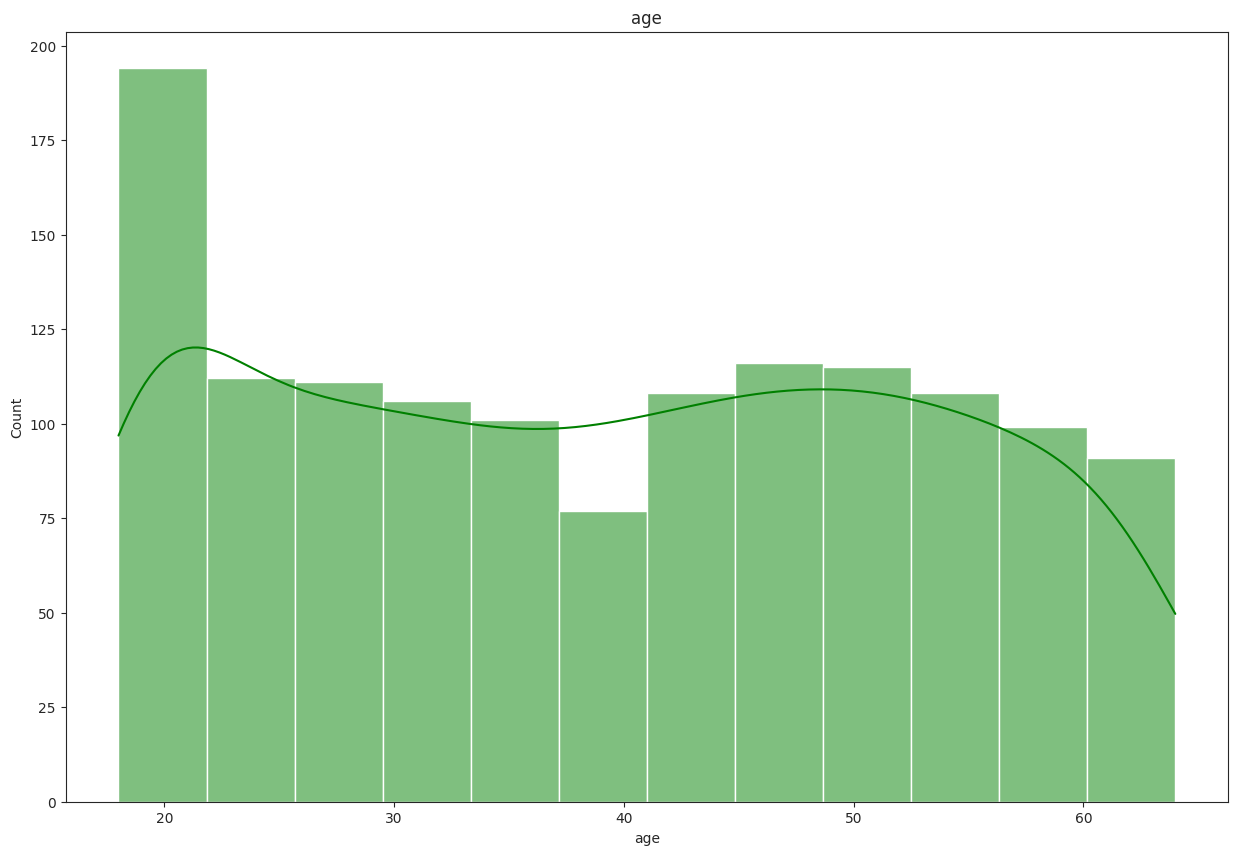

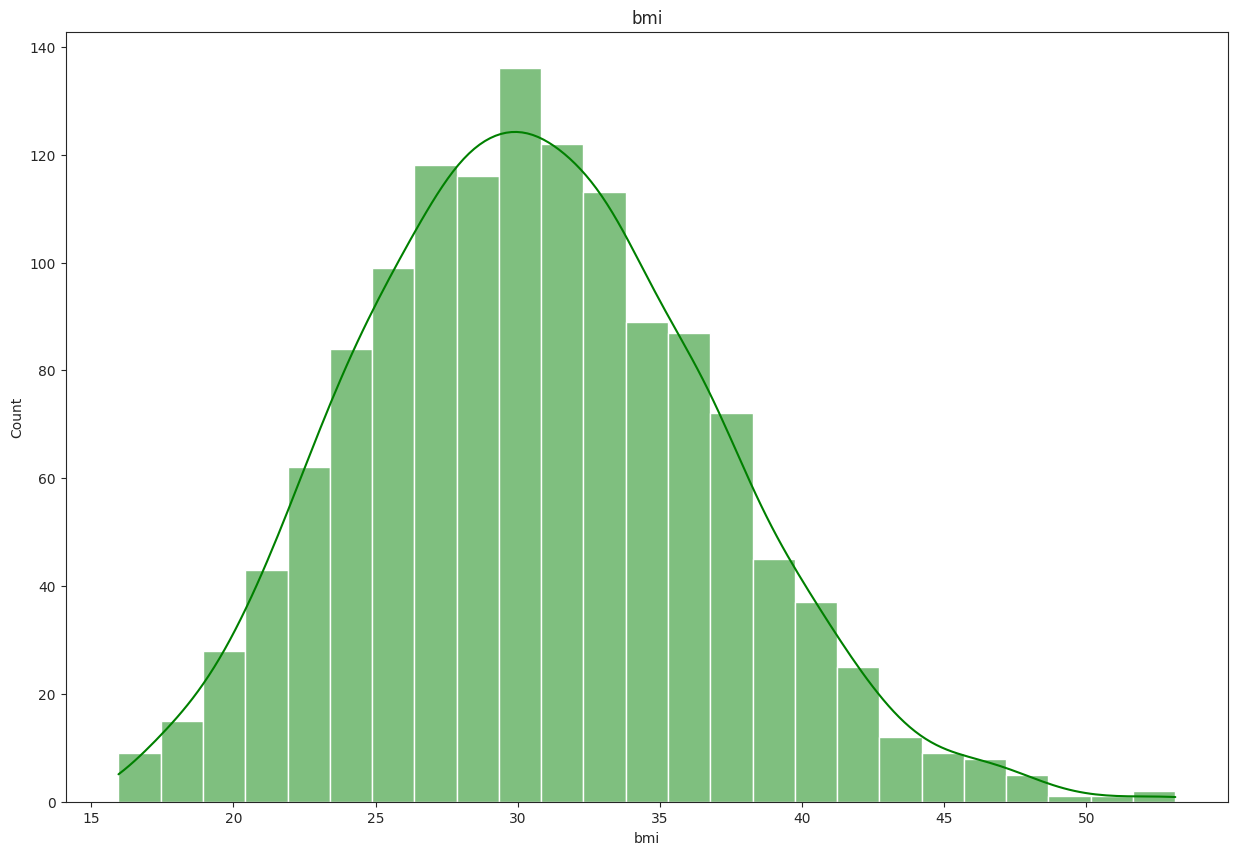

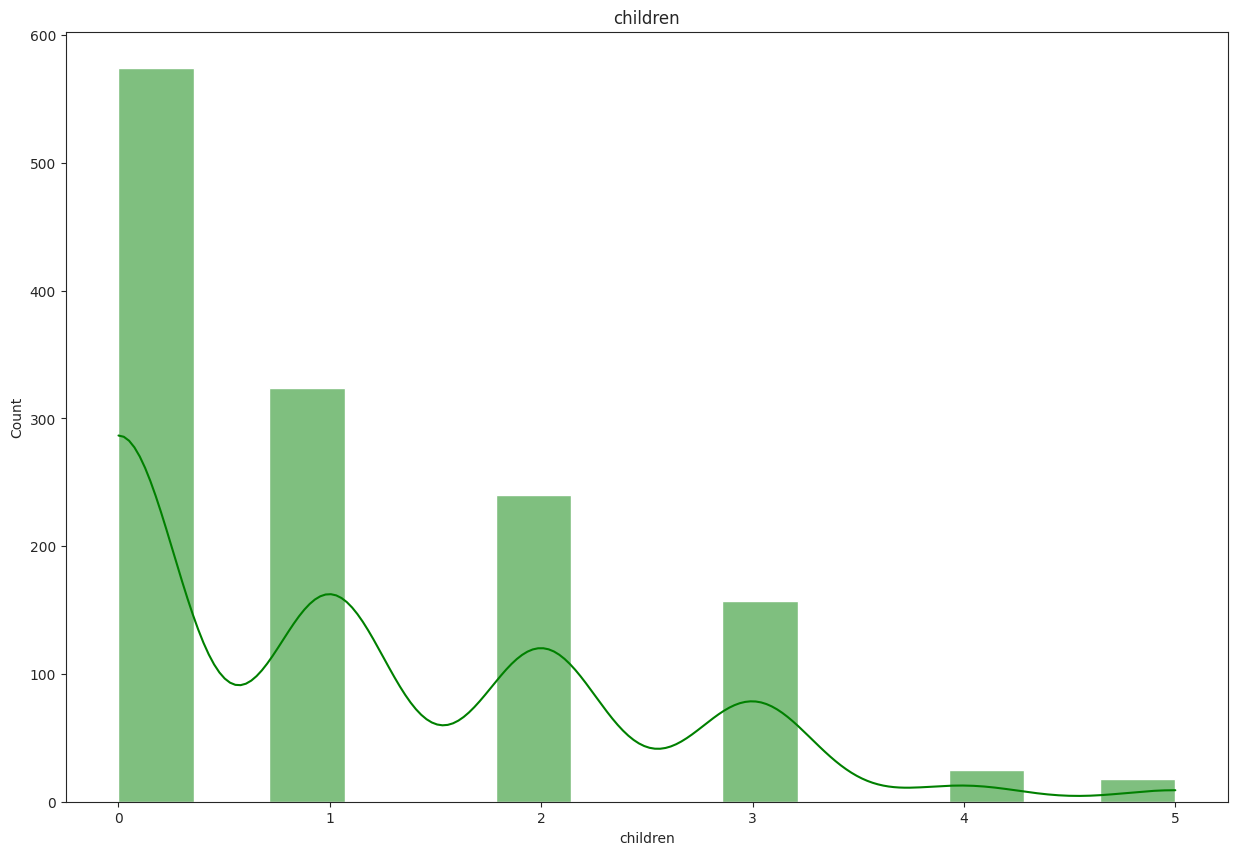

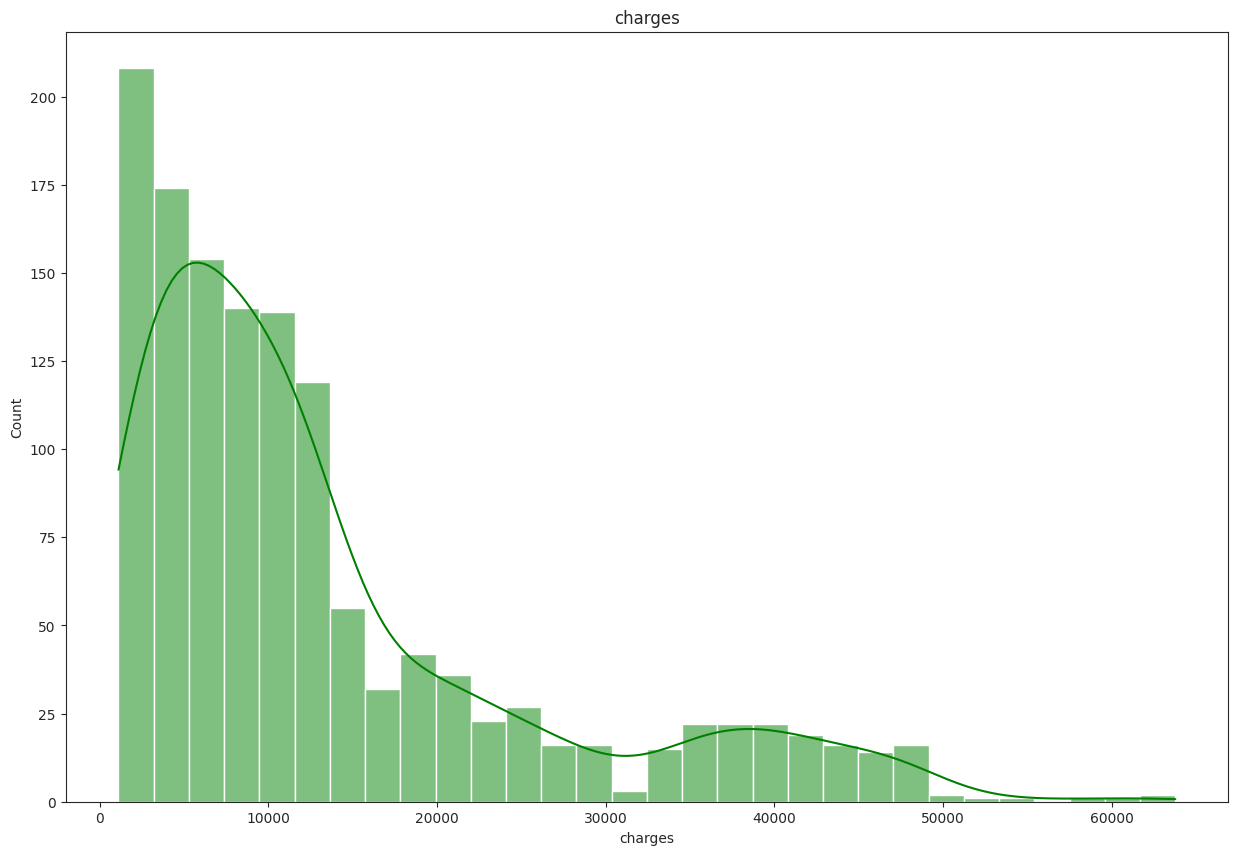

<Figure size 640x480 with 0 Axes>

In [17]:
for i in numerical_variables:

    plt.figure(figsize=(15,10))

    sns.histplot(numerical_variables[i], kde=True, color='green')

    plt.title(i)

    plt.show()

plt.tight_layout()

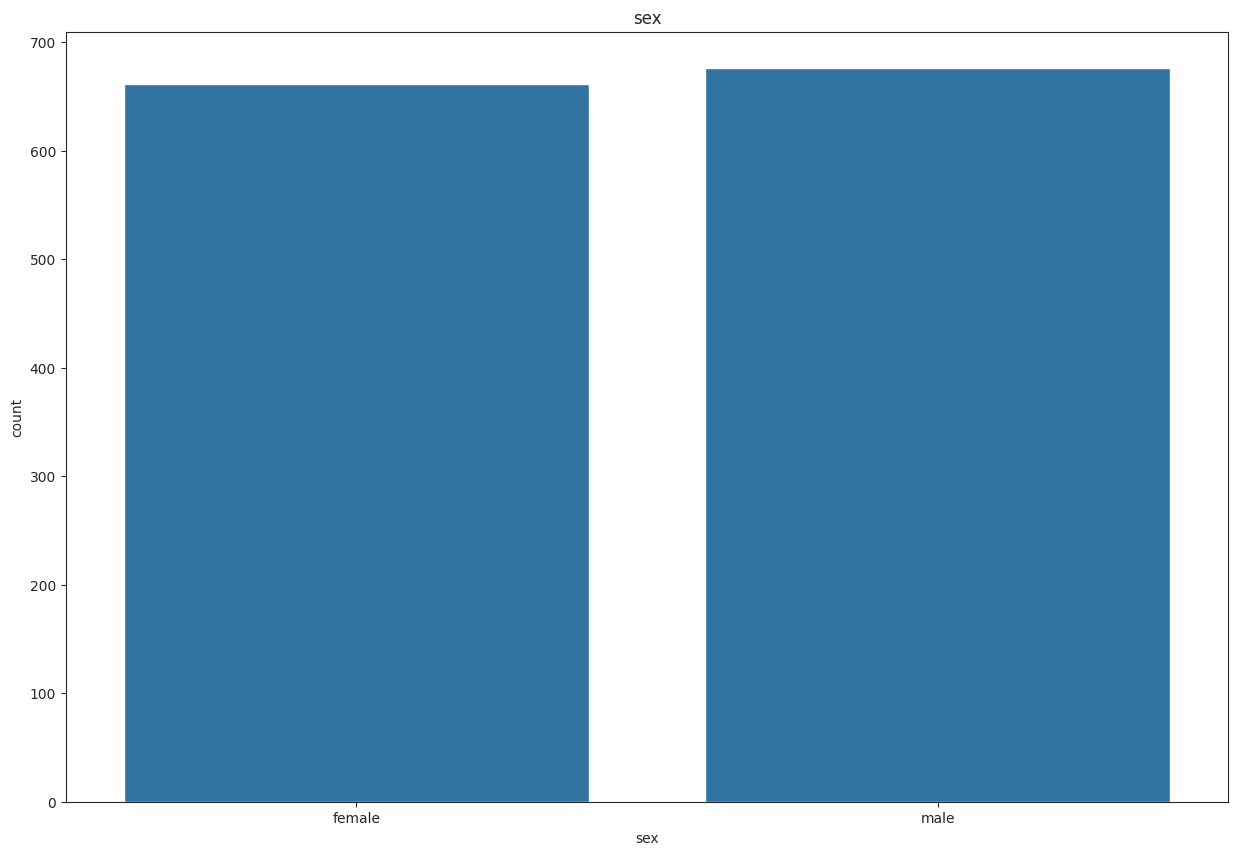

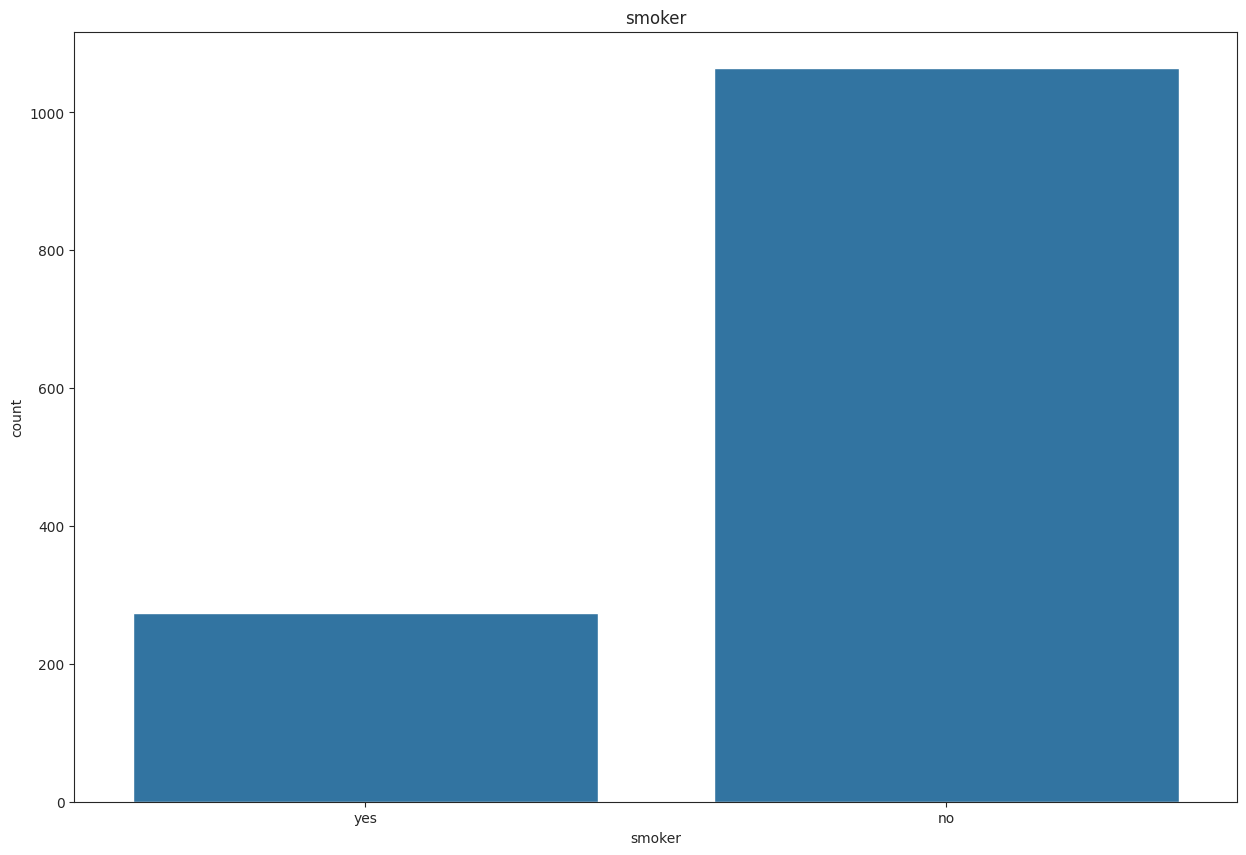

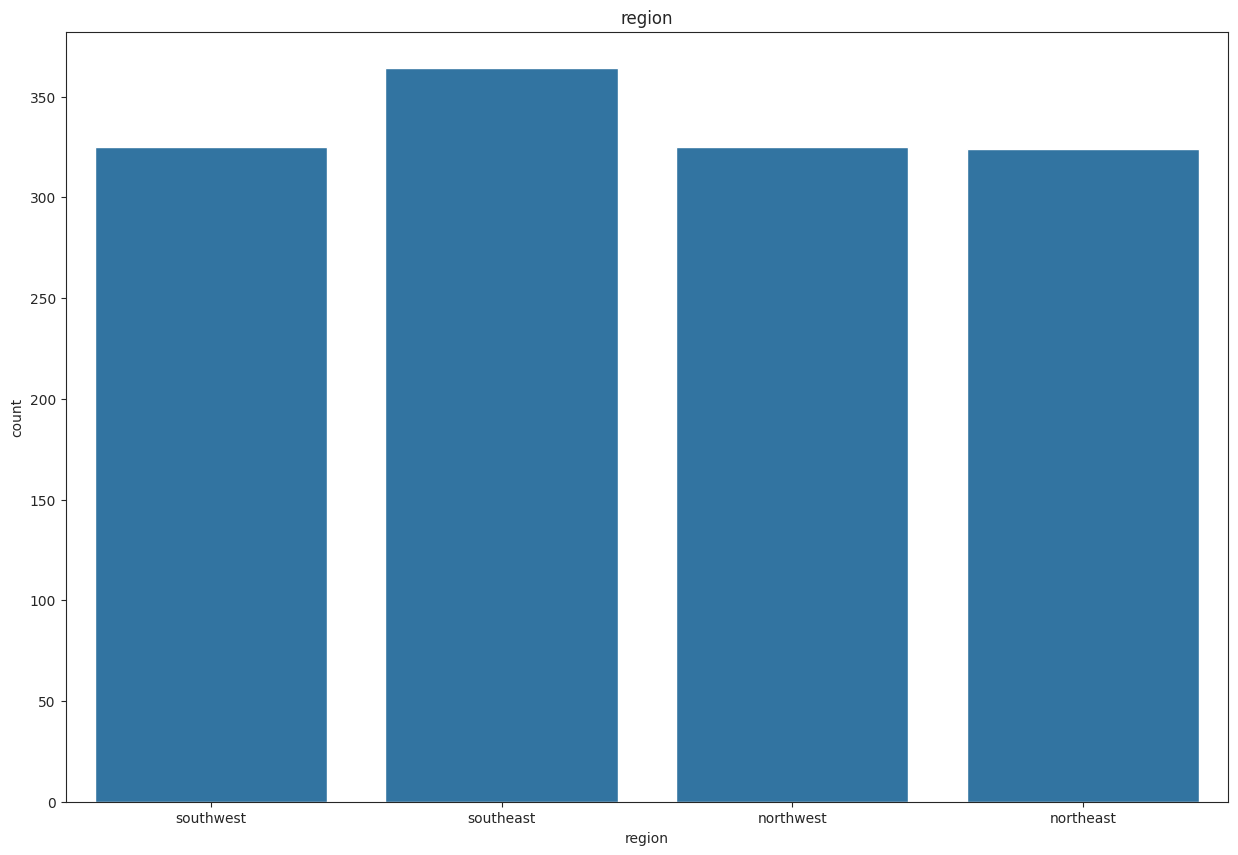

<Figure size 640x480 with 0 Axes>

In [19]:
for i in categorical_variable.columns:

    plt.figure(figsize=(15,10))

    sns.countplot(x=i, data=categorical_variable)

    plt.title(i)

    plt.show()

plt.tight_layout()


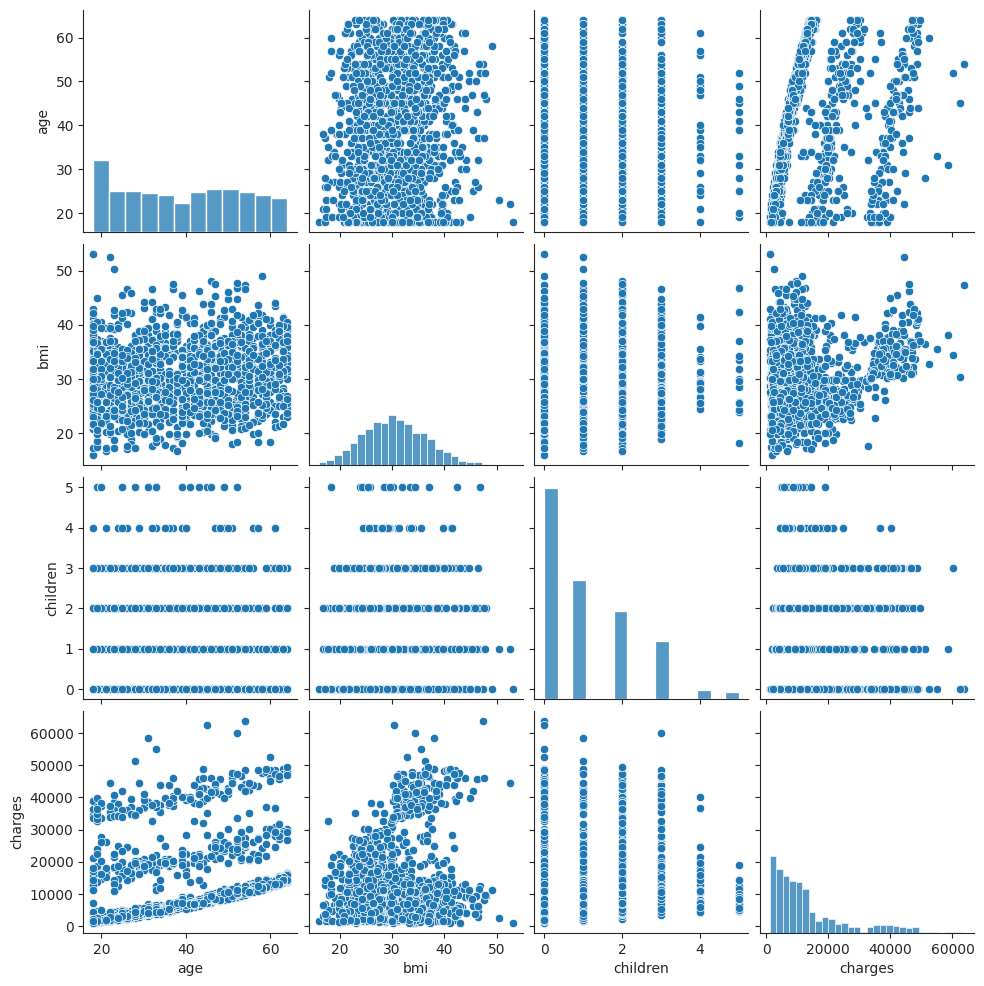

In [20]:
sns.pairplot(df)

data preprocessing 2

In [21]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df.duplicated().sum()

1

In [23]:
df.drop_duplicates(inplace=True)

In [25]:
categorical_variable.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [26]:
numerical_variables.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [27]:
df[['sex', 'smoker', 'region']]=df[['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)

df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


Feature engineering

<Axes: >

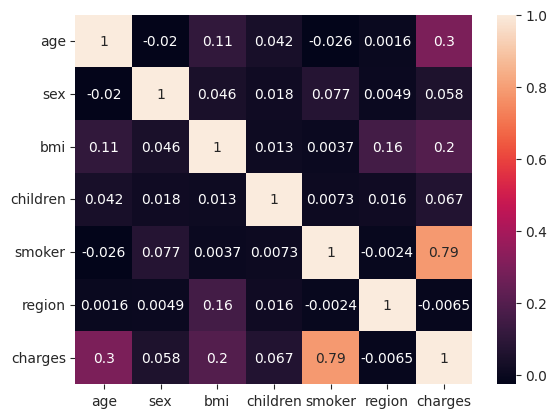

In [30]:
data_cor=df.corr()

plt.figure()

sns.heatmap(data_cor,annot=True)

In [31]:
X=df.iloc[:, 0:6]
y=df['charges']

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(935, 6)
(402, 6)
(935,)
(402,)


In [34]:
lr_mdl=LinearRegression()

lr_mdl.fit(X_train,y_train)

lr_pred=lr_mdl.predict(X_test)

lr_r2_score=r2_score(y_test,lr_pred)

<ipython-input-35-96fd391b0400>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='green')


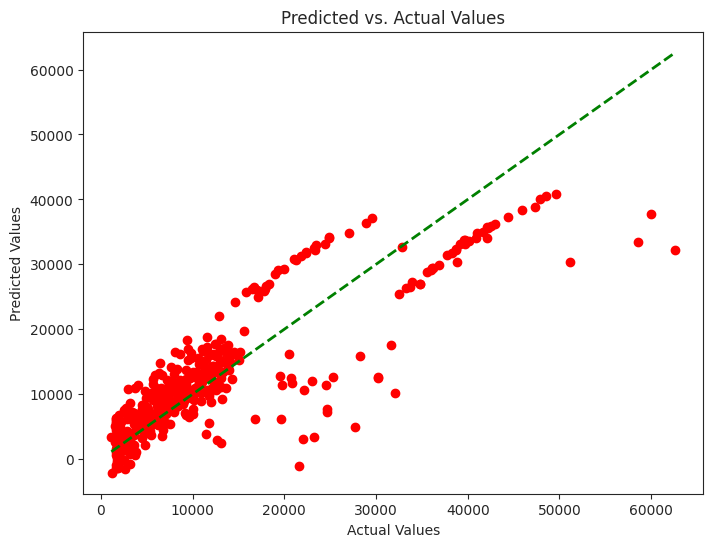

In [35]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, lr_pred,color='red')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='green')

plt.title('Predicted vs. Actual Values')

plt.xlabel('Actual Values')

plt.ylabel('Predicted Values')

plt.show()

In [36]:
r2 = r2_score(y_test, lr_pred)

mae = mean_absolute_error(y_test, lr_pred)

mse = mean_squared_error(y_test, lr_pred)

rmse = np.sqrt(mse)

print(f"R-squared: {r2:.4f}\n")

print(f"Mean Absolute Error: {mae:.4f}\n")

print(f"Mean Squared Error: {mse:.4f}\n")

print(f"Root Mean Squared Error: {rmse:.4f}\n")

R-squared: 0.7340

Mean Absolute Error: 4196.3730

Mean Squared Error: 36435712.7166

Root Mean Squared Error: 6036.2002

